In [1]:
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
from matplotlib import pylab as plt
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':10})
from astropy import units
from astropy.cosmology import Planck15
from astropy import constants
plt.style.use(['classic'])

from scipy.stats import binned_statistic
from pyigm.abssys import dla
from astropy.stats import sigma_clip
from scipy.interpolate import interp1d

In [177]:
#loading continuum model 

conti_model = np.loadtxt("/Users/Jenny/documents/grad_project_1/project_1_data/conti_model_new_1125_metal_0902")

#conti_model = [1.631358,1.587381,1.522145,1.433275,1.425194,1.433147,1.494491,1.506456,1.504351,1.428235,1.393186
#,1.401350]

In [162]:
#tau_model = [0.252667,0.307288,0.359954,0.386289,0.4407,0.5029,0.56587,0.668293,0.834863,1.075508]
tau_model = [0.269049,0.323708,0.376354,0.402698,0.457069,0.519311,0.582262,0.684700,0.851293,1.091899]

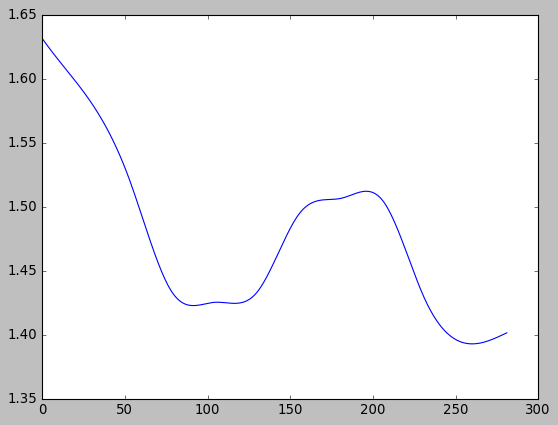

In [180]:
plt.plot(conti_model)
plt.show()


In [181]:
#loading data
dataw = np.loadtxt("/Users/Jenny/documents/grad_project_1/project_1_data/wave_0812.txt")
dataf = np.loadtxt("/Users/Jenny/documents/grad_project_1/project_1_data/flux_0812.txt")


In [182]:
data_z = np.loadtxt("zratiosnr22.txt")

        

In [183]:
dataw

array([[1075.12536081, 1075.37294372, 1075.62059076, ..., 1146.46051998,
        1146.7245288 , 1146.98860318],
       [1075.12490152, 1075.37249348, 1075.62013011, ..., 1146.46003405,
        1146.72404837, 1146.98811997],
       [1075.12438412, 1075.37197215, 1075.61961285, ..., 1146.45949612,
        1146.72350485, 1146.98757986],
       ...,
       [1075.1310194 , 1075.3786107 , 1075.62623073, ..., 1146.46656246,
        1146.73057198, 1146.9946252 ],
       [1075.12275056, 1075.37031204, 1075.61797954, ..., 1146.45772349,
        1146.72174636, 1146.98582437],
       [1075.13185447, 1075.3794665 , 1075.62709338, ..., 1146.46746187,
        1146.73147187, 1146.995547  ]])

In [184]:
def deltaalpha_plot(conti,xdata,dataflux,ref,data_zf):
    #plotting delta tau
   
    x2 = np.array(xdata) / np.array(1215.67 / (1+np.array(np.split(data_zf, len(data_zf))))) - 1
    tau = -np.log(np.array(dataflux)/conti)
    xalpha = np.ravel(x2)
    tautotal = np.ravel(tau)
    deltatau = tautotal - np.mean(tautotal[np.where((ref-0.005 < xalpha)&(xalpha< ref+0.005))])
    print (np.mean(tautotal[np.where((ref-0.005 < xalpha)&(xalpha< ref+0.005))]))
   
    plt.figure(figsize=(13,12))
    plt.scatter(xalpha[:6000],deltatau[:6000],s=3)
    #plt.xlim(0,2.8)
    plt.xlabel('zalpha')
    plt.ylabel('deltatau')
    #plt.savefig('/Users/Jenny/desktop/deltaualpha_new.png')
    plt.show()
    return xalpha,tautotal,deltatau


In [185]:
(1+np.array(np.split(data_z[:,0][3:], len(data_z[:,0][3:])))) - 1


array([[2.84952959],
       [2.95062568],
       [3.04919773],
       [3.14875346],
       [3.2480309 ],
       [3.3450856 ],
       [3.4461385 ],
       [3.5517966 ],
       [3.64821476],
       [3.74814819],
       [3.84554038],
       [3.94690707],
       [4.08444481],
       [4.28969931],
       [4.49270692],
       [4.69101035]])

0.374197994044045


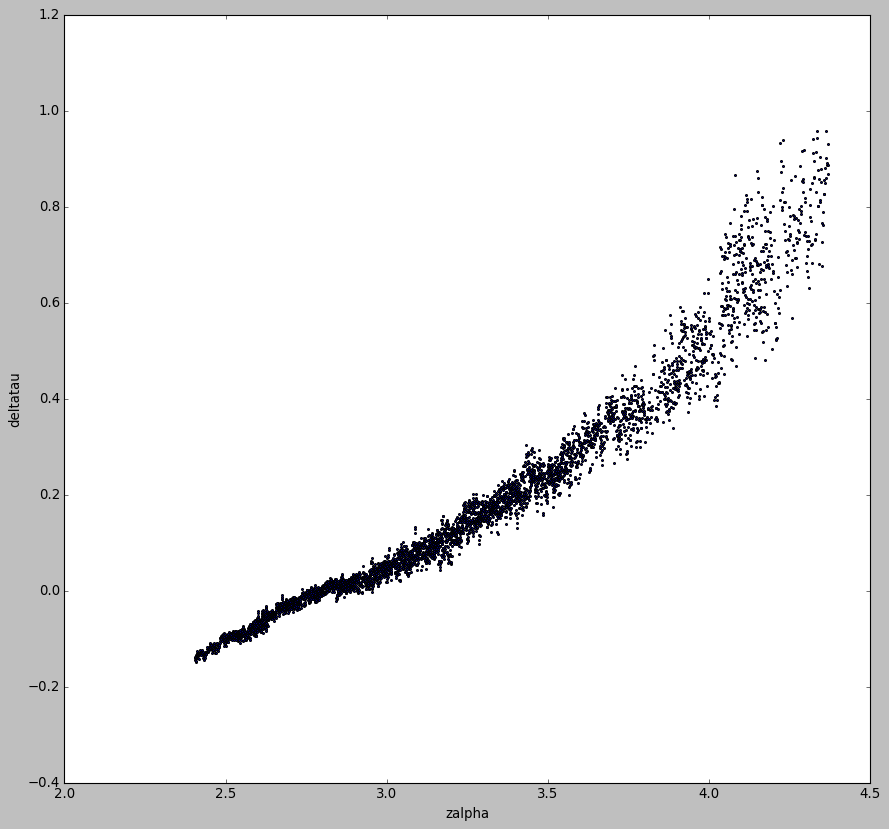

In [190]:
xalpha,tauf,deltatau = deltaalpha_plot(conti_model,dataw,dataf,2.8,data_z[:,0][3:])


In [191]:
data=np.array(np.c_[xalpha,tauf])


In [252]:
np.savetxt("tau_0909.txt",data,delimiter=' ',newline='\n')



In [193]:
x2t = np.sort(np.ravel(data[:,0]))
xinterl = binned_statistic(x2t[x2t<3.5],x2t[x2t<3.5],bins = 10-3)[0]
xinterh = binned_statistic(x2t[x2t>3.5],x2t[x2t>3.5],bins = 3)[0]
xinter = np.append(xinterl,xinterh)
tau= interp1d(xinter,tau_model,fill_value = 'extrapolate')
tau_1=tau(data[:,0])

In [194]:
xinter

array([2.49546344, 2.64093513, 2.79701489, 2.95052517, 3.10830593,
       3.26551619, 3.41798772, 3.63081688, 3.9405167 , 4.19933258])

In [195]:
def func2(x,amp2,index2,c):
    fx = amp2 * ((1 + x)/(1+3.5)) ** index2+c

    return fx 


In [196]:
tau_2020 = 0.0055*(data[:,0]+1)**3.18


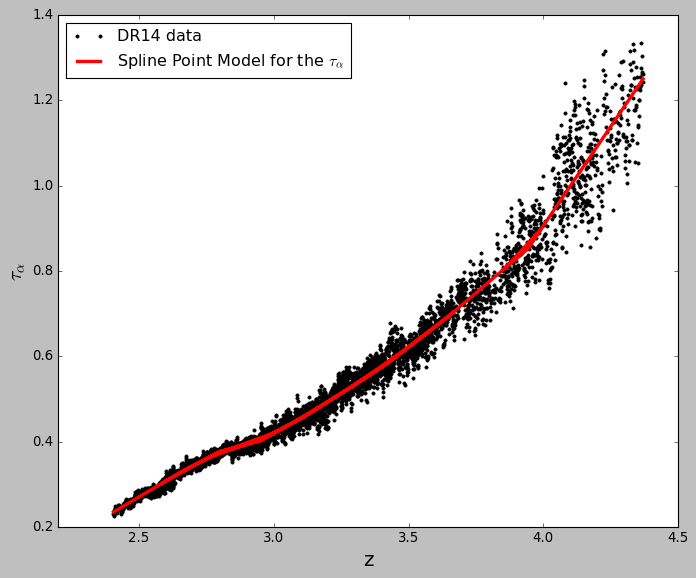

In [197]:
plt.figure(figsize=(10,8))
plt.plot(data[:,0],data[:,1],'.',c='k',label = 'DR14 data')
plt.plot(data[:,0],tau_1,c='r',linewidth = 3,label = r'Spline Point Model for the $\tau_{\alpha}$')

#plt.plot(data[:,0],func2(data[:,0],0.751,2.9,-0.132),c='b',linewidth = 3,label = r'$\tau_{\alpha}$ from Becker et al. 2013')
plt.legend(loc=2)
plt.xlim(2.2,4.5)
plt.ylabel(r'$\tau_{\alpha}$',fontsize=18)
plt.xlabel(r'z',fontsize=18)
#plt.savefig('final_tau_opticalcor.pdf')
plt.show()


In [131]:
tau_1


array([0.23486405, 0.23515862, 0.23545327, ..., 1.24781342, 1.24896239,
       1.25011165])

In [83]:
np.savetxt('/Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data_otcorrection_0404.txt',np.c_[data[:,0],data[:,1]] ,delimiter=' ', newline='\n')


np.savetxt('/Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/tau_otcorrection_0404.txt',np.c_[data[:,0],tau_1] ,delimiter=' ', newline='\n')



In [198]:
#loading the optically thick absorbers correction
tau_decre= np.loadtxt('/Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/fn_otcorrection_2.3-4.5_17-22.txt')



In [199]:
tau_decre


array([[2.2       , 0.01207727],
       [2.21      , 0.01219658],
       [2.22      , 0.01231663],
       [2.23      , 0.01243744],
       [2.24      , 0.01255901],
       [2.25      , 0.01268134],
       [2.26      , 0.01280444],
       [2.27      , 0.0129283 ],
       [2.28      , 0.01305292],
       [2.29      , 0.01317832],
       [2.3       , 0.01330449],
       [2.31      , 0.01343143],
       [2.32      , 0.01355915],
       [2.33      , 0.01368765],
       [2.34      , 0.01381693],
       [2.35      , 0.01394699],
       [2.36      , 0.01407784],
       [2.37      , 0.01420948],
       [2.38      , 0.0143419 ],
       [2.39      , 0.01447512],
       [2.4       , 0.01460914],
       [2.41      , 0.01474395],
       [2.42      , 0.01487956],
       [2.43      , 0.01501597],
       [2.44      , 0.01515319],
       [2.45      , 0.01529121],
       [2.46      , 0.01543004],
       [2.47      , 0.01556969],
       [2.48      , 0.01571014],
       [2.49      , 0.01585141],
       [2.

In [200]:

f = interp1d(tau_decre[:,0],tau_decre[:,1])


In [201]:
f(data[:,0])


array([0.01466956, 0.01468013, 0.0146907 , ..., 0.05939153, 0.059433  ,
       0.05947449])

In [202]:
decrement= 0.0045*((1+data[:,0])/3)**3.0


In [203]:
np.log(data[:,1])


array([-1.472094  , -1.45379093, -1.43934081, ...,  0.26599287,
        0.21759172,  0.23261034])

In [204]:
#corrected for the optically thick absorbers
lya_tau = data[:,1]-f(data[:,0])


In [205]:
flux = np.exp(-lya_tau)


In [206]:
flux


array([0.80672296, 0.80331963, 0.80060044, ..., 0.28784469, 0.30616031,
       0.30046765])

In [207]:
lya_flux = flux


In [208]:
lya_flux


array([0.80672296, 0.80331963, 0.80060044, ..., 0.28784469, 0.30616031,
       0.30046765])

In [209]:
#corner= pd.read_csv("/Users/Jenny/Documents/pycodes/Mock_spectra/new_measurement_0211/cornerplot.csv")



In [210]:
def cornerplot(spline):
    err = []
    for ii in range(0,22):
        filtered_data = sigma_clip(spline[str(ii)], sigma=5, maxiters=5)
        y16 = np.percentile(filtered_data, 0.3, axis=0)
        y84 = np.percentile(filtered_data, 99.7, axis=0)
        err.append([y16,y84])
    return err   


In [211]:
errhpdu  = [0.251368,0.306029,0.358918,0.384950,0.439176,0.501395,0.564257,0.666729,0.831394,1.066672]
#[0.272378,0.326766,0.379535,0.405640,0.460225,0.522390,0.585261,0.687928,0.855561,1.102179]
errhpdl  = [0.286178,0.341084,0.393820,0.420021,0.474254,0.536726,0.599634,0.702746,0.870875,1.117797]
#[0.234749,0.288855,0.341790,0.367754,0.422287,0.484436,0.547016,0.649124,0.813650,1.049018]


In [213]:
lya_model = np.exp(-tau_1)+decrement


In [214]:
lya_tau_cor = tau_1-f(data[:,0])


In [215]:
lya_tau_cor


array([0.22019448, 0.22047849, 0.22076257, ..., 1.18842189, 1.18952939,
       1.19063716])

In [216]:
beckr= [0.8806,0.8590,0.8304,0.7968,0.7810,0.7545,0.7371,0.7167,0.6966,0.6670,
        0.6385,0.6031,0.5762,0.5548,0.5325,0.4992, 0.4723,0.4470,0.4255,0.4030,0.3744,0.3593,0.3441,0.3216,0.3009,0.2881,0.2419,0.2225]

beckrerror = [0.0103,0.0098,0.0093,0.0089,0.0090,0.0088,0.0088,0.0086,0.0084,0.0082,0.0080,0.0079,0.0074,
              0.0071,0.0071,0.0069,0.0068, 0.0072,0.0071,0.0071,0.0074,0.0075,0.0102,0.0094,0.0104,0.0117,0.0201,0.0151] 
beckz = [2.15,2.25,2.35,2.45,2.55,2.65,2.75,2.85,2.95,3.05,3.15,3.25,3.35,3.45,3.55,3.65,3.75,3.85,3.95,4.05,4.15,4.25 
,4.35,4.45,4.55,4.65,4.75,4.85]

In [217]:
len(beckr),len(beckrerror)


(28, 28)

In [218]:
fauchr= [0.127,0.164,0.203,0.251,0.325,0.386,0.415,0.570,0.716,0.832,0.934,1.061]


faucherror = [0.023,0.020,0.019,0.022,0.026,0.029,0.031,0.039,0.051
,0.051,0.064,0.121] 
fauchz = [2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0 ,4.2] 

In [219]:
Dar= [0.183,0.211,0.233,0.256,0.291,0.315,0.331,0.359,0.376,0.426,0.459,0.499,0.531
,0.561,0.617,0.668,0.729,0.748,0.804,0.787,0.888,0.895,1.043]
Daerror = [0.002,0.003,0.003,0.003,0.004,0.004,0.004,0.008,0.008,0.008,0.008,0.008,0.009,0.010
,0.011,0.012,0.016,0.016,0.017,0.025,0.026,0.027,0.028] 
Daz = [2.16,2.26,2.36,2.46,2.56,2.66,2.76,2.86,2.96,3.06,3.16,3.26,3.36,3.46,3.56,3.66,3.76,3.86,3.96,4.06,4.16,4.26,4.36] 



In [220]:
Par1 = [0.819,0.790,0.775,0.760,0.736,0.721,0.706,0.687,
0.682,
0.642,
0.619,
0.581,
0.582,
0.549,
0.524,
0.477,
0.475,
0.428]
Par2 = [0.809,0.781,0.767,0.750,0.725,0.709,0.694,0.670,0.656,0.616,0.594,0.562,0.561
,0.523,0.495,0.432,0.428,0.385]

In [221]:
Paz = [2.34,2.44,2.54,2.64,2.74,2.84,2.94,3.04,3.14,3.25,3.34,3.44,3.54,3.64
,3.74,3.84,3.93,4]
Paerror = np.array(Par1)-np.array(Par2)
Par = Par2


In [222]:
z = xinter



In [223]:
f(data[:,0])


array([0.01466956, 0.01468013, 0.0146907 , ..., 0.05939153, 0.059433  ,
       0.05947449])

In [225]:

errl = interp1d(z,errhpdl-f(z),fill_value='extrapolate')
erru = interp1d(z,errhpdu-f(z),fill_value='extrapolate')


In [226]:
errl,erru


(<scipy.interpolate.interpolate.interp1d at 0x7f8740163e50>,
 <scipy.interpolate.interpolate.interp1d at 0x7f875044a360>)

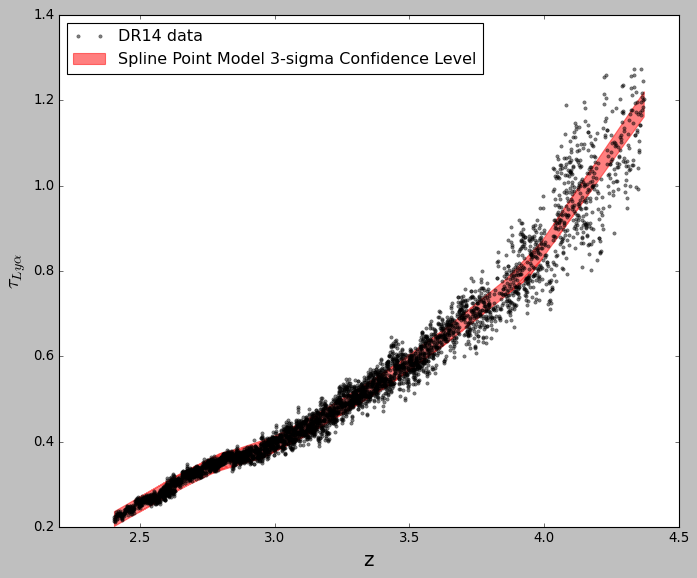

In [228]:
#plotting final results

plt.figure(figsize=(10,8))
#plt.scatter(beckz,-np.log(beckr),zorder=3,c='r')

#plt.errorbar(beckz,-np.log(beckr),yerr=beckrerror,linestyle="None",capsize=5,zorder=4,c='grey',markersize =5,label = 'Measurement from Becker et al. 2013')
plt.plot(data[:,0],-np.log(flux),'.',c='k',label = 'DR14 data',alpha = 0.5)
plt.fill_between(data[:,0],y1=errl(data[:,0]),y2=erru(data[:,0]),where=None, step=None,color='r',alpha=0.5,label = 'Spline Point Model 3-sigma Confidence Level')
#plt.plot(data[:,0],lya_tau_cor,c='b',linewidth = 3,label = r'Spline Point Model for the $\tau_{\alpha}$',alpha=0.5)
#plt.plot(data[:,0],func2(data[:,0],0.751,2.9,-0.132),c='b',linewidth = 3,label = r'$\tau_{\alpha}$ from Becker et al. 2013')
plt.legend(loc=2)
plt.xlim(2.2,4.5)
plt.ylabel(r'$\tau_{Ly\alpha}$',fontsize=18)
plt.xlabel(r'z',fontsize=18)
plt.savefig('final_tau_opticaldepth_0905.pdf')

plt.show()

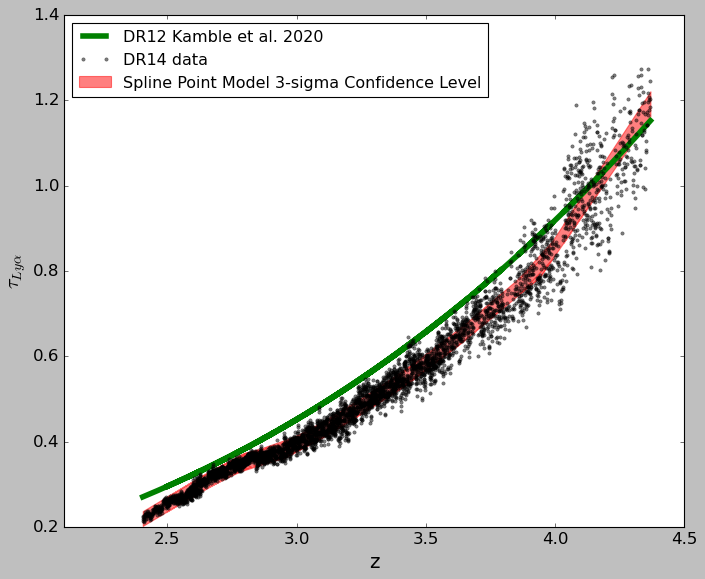

In [250]:
#plotting comparison with previous literature (Kamble et al. 2020)
plt.figure(figsize=(10,8))
plt.fill_between(data[:,0],y1=errl(data[:,0]),y2=erru(data[:,0]),where=None, step=None,color='r',alpha=0.5,label = 'Spline Point Model 3-sigma Confidence Level')
#plt.scatter(beckz,-np.log(beckr),zorder=3,c='r')
plt.plot(data[:,0],tau_2020,'-',c='g',label = 'DR12 Kamble et al. 2020',linewidth = 5)
plt.plot(data[:,0],-np.log(flux),'.',c='k',label = 'DR14 data',alpha = 0.5)
#plt.errorbar(beckz,-np.log(beckr),yerr=beckrerror,linestyle="None",capsize=5,zorder=4,c='blue',label = 'Measurement from Becker et al. 2013')
#plt.plot(data[:,0],-np.log(lya_flux),'.',c='k',label = 'DR14 data',alpha = 0.5)
#plt.plot(data[:,0],lya_tau_cor,c='b',linewidth = 3,label = r'Spline Point Model for the $\tau_{\alpha}$',alpha=0.5)
#plt.plot(data[:,0],func2(data[:,0],0.751,2.9,-0.132),c='b',linewidth = 3,label = r'$\tau_{\alpha}$ from Becker et al. 2013')
plt.legend(loc=2)
plt.xlim(2.1,4.5)
plt.ylabel(r'$\tau_{Ly\alpha}$',fontsize=18)
plt.xlabel(r'z',fontsize=18)
plt.savefig('Tau_comparison_0905.pdf')

plt.show()

In [230]:
np.log(np.array(Dar))


array([-1.69826913, -1.55589715, -1.45671683, -1.36257783, -1.23443201,
       -1.15518264, -1.1056369 , -1.02443289, -0.97816614, -0.85331593,
       -0.77870507, -0.69514918, -0.63299326, -0.57803437, -0.48288626,
       -0.40346711, -0.31608155, -0.2903523 , -0.21815601, -0.23952703,
       -0.11878354, -0.11093156,  0.04210118])

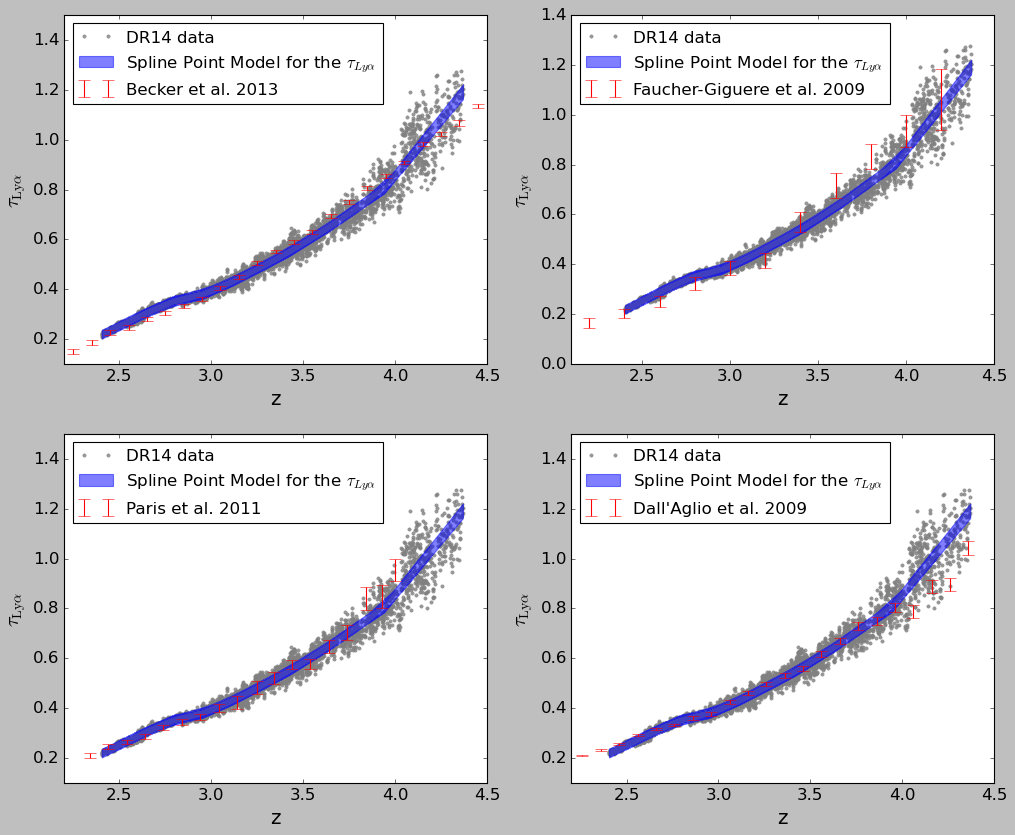

In [251]:
#plotting comparison with previous literature 


ax=plt.figure(figsize=(15,12))
plt.subplot(441)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

ax1.fill_between(data[:,0],y1=errl(data[:,0]),y2=erru(data[:,0]),zorder=4,where=None, step=None,color='b',alpha=0.5,label = r'Spline Point Model for the $\tau_{Ly\alpha}$')
#ax1.scatter(beckz,-np.log(beckr),zorder=3,c='r')
ax1.errorbar(beckz,-np.log(beckr),yerr=beckrerror,linestyle="None",capsize=5,zorder=4,c='r',markersize =5,label = 'Becker et al. 2013')
ax1.plot(data[:,0],-np.log(lya_flux),'.',c='grey',label = 'DR14 data',alpha = 0.8)


#ax1.plot(data[:,0],lya_tau_cor,c='b',linewidth = 3,label = r'Spline Point Model for the $\tau_{\alpha}$',alpha=0.5)
#plt.plot(data[:,0],func2(data[:,0],0.751,2.9,-0.132),c='b',linewidth = 3,label = r'$\tau_{\alpha}$ from Becker et al. 2013')
ax1.legend(loc=2,prop={'size': 15})
ax1.set_xlim(2.2,4.5)
ax1.set_ylim(0.1,1.5)
#ax1.set_yscale('log')
ax1.set_ylabel(r'$\rm{\tau_{Ly\alpha}}$',fontsize=18)
ax1.set_xlabel(r'z',fontsize=18)

# add a subplot with no frame
ax2 = plt.subplot(222)
ax2.fill_between(data[:,0],y1=errl(data[:,0]),y2=erru(data[:,0]),zorder=4,where=None, step=None,color='b',alpha=0.5,label = r'Spline Point Model for the $\tau_{Ly\alpha}$')

#ax2.scatter(fauchz,fauchr,zorder=3,c='r')
ax2.errorbar(fauchz,fauchr,yerr=faucherror,linestyle="None",capsize=5,zorder=4,c='r',label = 'Faucher-Giguere et al. 2009')
ax2.plot(data[:,0],-np.log(lya_flux),'.',c='grey',label = 'DR14 data',alpha = 0.8)
#ax2.plot(data[:,0],lya_tau_cor,c='b',linewidth = 3,label = r'Spline Point Model for the $\tau_{\alpha}$',alpha=0.5)
#plt.plot(data[:,0],func2(data[:,0],0.751,2.9,-0.132),c='b',linewidth = 3,label = r'$\tau_{\alpha}$ from Becker et al. 2013')
ax2.legend(loc=2,prop={'size': 15})
ax2.set_xlim(2.1,4.5)
ax2.set_ylabel(r'$\rm{\tau_{Ly\alpha}}$',fontsize=18)
ax2.set_xlabel(r'z',fontsize=18)

ax3 = plt.subplot(2, 2, 3)
ax3.fill_between(data[:,0],y1=errl(data[:,0]),y2=erru(data[:,0]),zorder=4,where=None, step=None,color='b',alpha=0.5,label = r'Spline Point Model for the $\tau_{Ly\alpha}$')

#ax1.scatter(beckz,-np.log(beckr),zorder=3,c='r')
ax3.errorbar(Paz,-np.log(Par),yerr=Paerror,linestyle="None",capsize=5,zorder=4,c='r',markersize =5,label = r'Paris et al. 2011')
ax3.plot(data[:,0],-np.log(lya_flux),'.',c='grey',label = 'DR14 data',alpha = 0.8)
#ax3.plot(data[:,0],lya_tau_cor,c='b',linewidth = 3,label = r'Spline Point Model for the $\tau_{\alpha}$',alpha=0.5)
#plt.plot(data[:,0],func2(data[:,0],0.751,2.9,-0.132),c='b',linewidth = 3,label = r'$\tau_{\alpha}$ from Becker et al. 2013')
ax3.legend(loc=2,prop={'size': 15})
ax3.set_xlim(2.2,4.5)
ax3.set_ylim(0.1,1.5)
#ax1.set_yscale('log')
ax3.set_ylabel(r'$\rm{\tau_{Ly\alpha}}$',fontsize=18)
ax3.set_xlabel(r'z',fontsize=18)


ax4 = plt.subplot(2, 2, 4)
ax4.fill_between(data[:,0],y1=errl(data[:,0]),y2=erru(data[:,0]),zorder=4,where=None, step=None,color='b',alpha=0.5,label = r'Spline Point Model for the $\tau_{Ly\alpha}$')

#ax1.scatter(beckz,-np.log(beckr),zorder=3,c='r')
ax4.errorbar(Daz,Dar,yerr=Daerror,linestyle="None",capsize=5,zorder=4,c='r',markersize =5,label = "Dall'Aglio et al. 2009")
ax4.plot(data[:,0],-np.log(lya_flux),'.',c='grey',label = 'DR14 data',alpha = 0.8)
#ax3.plot(data[:,0],lya_tau_cor,c='b',linewidth = 3,label = r'Spline Point Model for the $\tau_{\alpha}$',alpha=0.5)
#plt.plot(data[:,0],func2(data[:,0],0.751,2.9,-0.132),c='b',linewidth = 3,label = r'$\tau_{\alpha}$ from Becker et al. 2013')
ax4.legend(loc=2,prop={'size': 15})
ax4.set_xlim(2.2,4.5)
ax4.set_ylim(0.1,1.5)
#ax1.set_yscale('log')
ax4.set_ylabel(r'$\rm{\tau_{Ly\alpha}}$',fontsize=18)
ax4.set_xlabel(r'z',fontsize=18)

plt.show()
ax.savefig('/Users/Jenny/desktop/final_tau_opticaldepth_p14_0905.pdf')


In [237]:
summarym = [1.631358,1.587381,1.522145,1.433275,1.425194,1.433147,1.494491,1.506456,1.504351,1.428235,1.393186,1.401350,0.269049,
0.323708,0.376354,0.402698,0.457069,0.519311,0.582262,0.684700,0.851293,1.091899]
#[1.607465,1.564119,1.499843,1.412265,1.404300,1.412135,1.472579,1.484371,1.482298,1.407295,1.372761,1.380799,0.252667,0.307288,0.359954,0.386289,0.4407,0.5029,0.56587,0.668293,0.834863,1.075508]

summaryl = [1.602245,1.559875,1.494913,1.408387,1.400330,1.407961,1.468024,1.479696,1.477618,1.402855,1.368636,1.376279,0.251368
,0.306029,0.358918,0.384950,0.439176,0.501395,0.564257,0.666729,0.831394,1.066672]
#[1.578369,1.535430,1.472595,1.386525,1.378950,1.386416,1.445792,1.457360,1.455215,1.381840,1.347502,1.355561,0.234749,0.288855,0.341790,0.367754,0.422287,0.484436,0.547016,0.649124,0.813650,1.049018] 

summaryu = [1.659724,1.615355,1.548118,1.458554,1.450172,1.458166,1.520364,1.532495,1.530394,1.452935,1.417506,1.425982,0.286178,0.341084
,0.393820,0.420021,0.474254,0.536726,0.599634,0.702746,0.870875
,1.117797]
#[1.635660,1.590566,1.525435,1.436401,1.428524,1.436384,1.497866,1.509828,1.507648,1.431595,1.396063,1.405309,0.272378,0.326766,0.379535,0.405640,0.460225,0.522390,0.585261,0.687928,0.855561,1.102179]
            
            



In [238]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [244]:
def plot_MCMC_model(n,data_indi_wave, data_indi_flux, summarym,summaryl,summaryu):
    """Plot the model on the data"""
    n=n
    n1=12
    n2=n-n1
   
    mean = []
    ylow =[]
    yup =[]
    for i in range(0,n):
        mean.append(summarym[i])
        ylow.append(summaryl[i])
        yup.append(summaryu[i])

    x2 = np.array(data_indi_wave) / np.array(1215.67 / (1+np.array(np.split(data_z[:,0][3:], len(data_z[:,0][3:]))))) - 1
    x2t = np.sort(np.ravel(x2))
    xinterl = binned_statistic(x2t[x2t<3.5],x2t[x2t<3.5],bins = n2-3)[0]
    xinterh = binned_statistic(x2t[x2t>3.5],x2t[x2t>3.5],bins = 3)[0]
    xinter = np.append(xinterl,xinterh)
    tau= interp1d(xinter,mean[n1:n],fill_value = 'extrapolate')
    tau_1=tau(x2)
       
        #wavelength for continuum model
    xi = np.linspace(data_indi_wave[5][0], data_indi_wave[5][len(data_indi_wave[5])- 1], n1)
       
    result_final1 = interp1d(xi, np.array(ylow[:n1]), kind='cubic')(data_indi_wave[5])*np.exp(-np.array(tau_1))
    result_final2 = interp1d(xi, np.array(yup[:n1]), kind='cubic')(data_indi_wave[5])*np.exp(-np.array(tau_1))
        #adding the constraint from Faucher2008
    data_redshift_base=[2.0,2.2,2.4,2.6,2.8]
    x1 = np.array(data_redshift_base)
        #print (result_final)
    result_model1 = np.append(result_final1,tau(x1))
    result_model2 = np.append(result_final2,tau(x1))
       
       

   
    fig, ax = plt.subplots(4, 2, figsize=(18, 20), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=False, sharey=False)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 8
   
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            ax[index][jndex].plot(np.array(data_indi_wave[k]/1215.67*(1+data_z[:,0][3:][k]))-1, data_indi_flux[k], label=r'z$_{c}$='+str(np.round(data_z[:,0][3:][k],2)) + ' Composite')
            #ax[index][jndex].plot(np.array(xdata[k]/1215.67*(1+data_z[k]))-1, result_model[k*282:(k+1)*282], label='model')
            ax[index][jndex].fill_between(np.array(data_indi_wave[k]/1215.67*(1+data_z[:,0][3:][k]))-1, result_model1[k*282:(k+1)*282], result_model2[k*282:(k+1)*282], color='red',alpha=0.5,label = 'Model 95% Confidence Level')
            #ax[index][jndex].set_xticklabels(labels = np.array(data_indi_wave[k]/1215.67*(1+data_z[:,0][3:][k]))-1,fontsize=15)
            ax[index][jndex].set_xlabel('z',fontsize=18)
            ax[index][jndex].set_ylabel('Flux',fontsize=18)
            ax[index][jndex].legend( prop={'size': 16})
       
           
           
            k = k + 1
           
   
   
    plt.savefig('model_fittednew_high_0905.pdf')
   
    plt.show()
    #plt.plot(data_redshift_base,tau(x1),label = 'Model 95% Confidence Level')
    #plt.plot(data_redshift_base,data_indi_tau,label = 'DR14 Composite')
    #plt.errorbar(data_redshift_base,data_indi_tau,yerr=np.array([0.018,0.013,0.009,0.01,0.012]),capsize = 2.0,label = 'faucher2008 data')
    #plt.savefig('model_fitted4.png')
    #plt.show()
   
   
   # plt.fill_between(xdata, mu - sig, mu + sig, color='lightgray')
   
   

    return  xi,xinter,result_model,tau_1,tau, interp1d(xi, np.array(mean[:n1]), kind='cubic')(data_indi_wave[5])